In [1]:
%pip install pygraphviz
# !sudo apt-get install software-properties-common
# !sudo apt-get install graphviz graphviz-dev

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.


In [3]:
from graph import Graph
from graph_nca import GraphNCA
# from growing_nn.graph.generated_network import GeneratedNetwork
# from ezrl.optimizer import RLOptimizer
# from ezrl.policy import GymPolicy
# from ezrl.algorithms.reinforce import ReinforceOptimizer

/home/pakhi/Documents/gsoc/gsoc-2024/ndp/env/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 3

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [5]:
NUM_CHANNELS

10

tensor([[ 4.5010e+02,  2.5082e+02,  1.6230e+01,  7.6259e-02, -7.7478e-01,
          7.0613e-02,  4.9830e-02,  5.6272e-01, -9.6599e-01, -1.0204e+00],
        [ 3.2078e+02,  2.5145e+02,  1.4070e+01,  1.9074e+00,  1.0949e+00,
          1.1159e+00, -2.9855e-01, -3.4307e-01, -6.4219e-01, -1.3277e+00]])


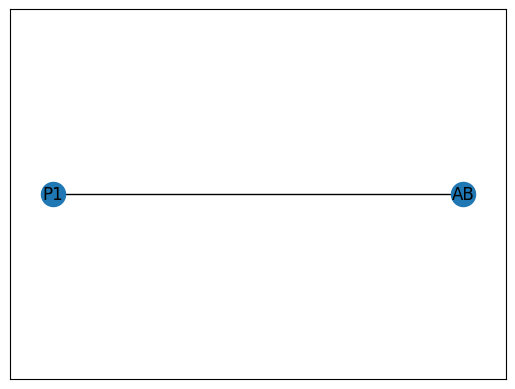

In [26]:
import torch
import numpy as np

x = torch.randn((2, NUM_CHANNELS))
x[0,0] = 450.10
x[0,1] = 250.82
x[0,2] = 16.23
x[1,0] = 320.78
x[1,1] = 251.45
x[1,2] = 14.07


edge_dict = {0:[1]}
label_dict = {0:"P1", 1:"AB"}
# edge_dict = {0:[2,3], 1:[2,3], 2:[], 3:[2], 4:[3,1], 5:[4,3], 6:[5,4], 7:[6,3], 8:[2,5,7], 9:[7,8,6]}
# x = torch.randn((6, NUM_CHANNELS))
# edge_dict = {0:[2, 4], 1:[2, 3, 4], 4:[5], 5:[2, 3], 2:[], 3:[]}

graph = Graph(x, edge_dict, label_dict)
image = graph.plot()    
print(graph.nodes)

In [27]:
# Image.fromarray(image).save("minimal_net.png")

In [28]:
# print("INPUT NODES", graph.input_nodes)
# print("OUTPUT NODES", graph.output_nodes)

In [29]:
import torch.distributions as td

def loss_fn(logits, actions, rewards):
    categorical = td.categorical.Categorical(logits=logits)
    log_probs = -categorical.log_prob(actions)
    return torch.sum(rewards*log_probs)

In [30]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)
optimizer = torch.optim.Adam(nca.parameters(), lr=0.001)

In [31]:
list(nca.parameters())

[Parameter containing:
 tensor([[ 1.8629e-01, -3.3345e-01,  3.6834e-01, -2.3442e-01, -1.9810e-01,
          -3.3869e-01, -3.7686e-01, -3.2009e-01,  2.9712e-02, -9.2504e-02],
         [-2.8958e-01, -3.0412e-01, -1.6624e-01,  2.9893e-01,  3.1596e-01,
          -2.3892e-01, -3.0200e-01,  2.3376e-01, -1.8298e-01, -7.8707e-03],
         [-3.8247e-01, -3.3702e-01, -1.5516e-01, -2.3737e-01, -9.9289e-02,
           3.1367e-01,  1.8747e-01, -3.1278e-01,  3.5017e-01,  2.1161e-01],
         [ 3.0092e-01, -2.3039e-01,  2.5940e-01,  2.4957e-02,  1.0897e-01,
          -8.0691e-02, -9.9231e-02, -2.4781e-01, -2.2867e-01,  1.5257e-01],
         [-3.7040e-01, -3.4213e-01,  3.8200e-01,  1.3051e-01,  2.0149e-01,
          -2.3043e-01, -1.9839e-02, -8.7805e-02,  1.1343e-01,  3.3540e-01],
         [ 3.8393e-01, -2.8472e-01,  1.4308e-01, -3.7626e-01, -2.1885e-01,
           1.2831e-01,  2.9280e-01,  3.3179e-01,  2.2626e-01,  2.5313e-02],
         [ 3.2710e-01, -8.0741e-02,  8.4353e-03, -8.5910e-03,  2.3109e-

In [32]:
print(nca.graph.to_data())

Data(x=[2, 10], edge_index=[2, 1])


In [33]:
# actions = torch.ones((32, 1)).long()
# optimizer.zero_grad()
# graph = nca.grow(graph = nca.graph, parent_index=2)
# generated_network = graph.generate_network()
# outputs, nodes = generated_network.batch_forward(torch.randn(32, 2))
# loss = loss_fn(outputs, actions, torch.ones((32,1))*2)
# loss.backward()
# optimizer.step()

In [34]:
list(nca.parameters())

[Parameter containing:
 tensor([[ 1.8629e-01, -3.3345e-01,  3.6834e-01, -2.3442e-01, -1.9810e-01,
          -3.3869e-01, -3.7686e-01, -3.2009e-01,  2.9712e-02, -9.2504e-02],
         [-2.8958e-01, -3.0412e-01, -1.6624e-01,  2.9893e-01,  3.1596e-01,
          -2.3892e-01, -3.0200e-01,  2.3376e-01, -1.8298e-01, -7.8707e-03],
         [-3.8247e-01, -3.3702e-01, -1.5516e-01, -2.3737e-01, -9.9289e-02,
           3.1367e-01,  1.8747e-01, -3.1278e-01,  3.5017e-01,  2.1161e-01],
         [ 3.0092e-01, -2.3039e-01,  2.5940e-01,  2.4957e-02,  1.0897e-01,
          -8.0691e-02, -9.9231e-02, -2.4781e-01, -2.2867e-01,  1.5257e-01],
         [-3.7040e-01, -3.4213e-01,  3.8200e-01,  1.3051e-01,  2.0149e-01,
          -2.3043e-01, -1.9839e-02, -8.7805e-02,  1.1343e-01,  3.3540e-01],
         [ 3.8393e-01, -2.8472e-01,  1.4308e-01, -3.7626e-01, -2.1885e-01,
           1.2831e-01,  2.9280e-01,  3.3179e-01,  2.2626e-01,  2.5313e-02],
         [ 3.2710e-01, -8.0741e-02,  8.4353e-03, -8.5910e-03,  2.3109e-

In [35]:
# OG


from matplotlib import pyplot as plt
# from celluloid import Camera
# from IPython.display import HTML
import pandas as pd

# fig = plt.figure()
# camera = Camera(fig)

# images = []
# img = graph.plot(fig=fig)
# fig.clear()
# images.append(img)
# for i in range(10):
    # print("ini graph",graph.nodes.size())
    # graph = nca.grow(graph = graph, parent_index=i)
    # print("returned graph",graph.nodes.size())
    # print("------")
    # img = graph.plot(fig=fig)
    # # camera.snap()
    # fig.clear()
    # images.append(img)
# print(f"Size of graph.labels: {len(graph.labels)}")
# print(f"Size of graph.edge_index: {graph.edge_dict.size()}")

# if graph.edge_index.size(0) == 0:
#     raise ValueError("graph.edge_index is empty. Cannot proceed with the growth process.")


cells_data = pd.read_csv('/home/pakhi/Documents/gsoc/gsoc-2024/Growing-GNNs/parent_daughters.csv')

fig = plt.figure()

images = []
plt.text(0.1, 0.9, 'Time: Initial', transform=fig.transFigure, fontsize=12, color='red')
fig.canvas.draw()
images.append(np.array(fig.canvas.renderer.buffer_rgba()))
fig.clear()

for time_stamp in sorted(cells_data['Birth Time'].unique()):
    # Filter rows with the current birth time
    rows_at_time = cells_data[cells_data['Birth Time'] == time_stamp]
    
    # Iterate through these rows
    for _, row in rows_at_time.iterrows():
        if row['Parent'] not in graph.labels.values():
            continue
        parent = row['Parent']
        daughter1 = row['Daughter 1']
        daughter2 = row['Daughter 2']
        print(parent, daughter1, daughter2)
        parent_index = list(graph.labels.keys())[list(graph.labels.values()).index(parent)]
        print(parent_index)
        graph = nca.grow(graph, parent_index, [daughter1, daughter2])
    img = graph.plot(fig=fig)
    plt.text(0.1, 0.9, f'Time: {time_stamp}', transform=fig.transFigure, fontsize=12, color='red')
    fig.canvas.draw()
    images.append(np.array(fig.canvas.renderer.buffer_rgba()))
    fig.clear()


1
grown graph torch.Size([3, 10])
0
grown graph torch.Size([4, 10])
1
grown graph torch.Size([5, 10])
3
grown graph torch.Size([6, 10])
2
grown graph torch.Size([7, 10])
4
grown graph torch.Size([8, 10])
3
grown graph torch.Size([9, 10])
6
grown graph torch.Size([10, 10])
5
grown graph torch.Size([11, 10])
9
grown graph torch.Size([12, 10])
7
grown graph torch.Size([13, 10])
8
grown graph torch.Size([14, 10])
9
grown graph torch.Size([15, 10])
10
grown graph torch.Size([16, 10])
11
grown graph torch.Size([17, 10])
12
grown graph torch.Size([18, 10])
14
grown graph torch.Size([19, 10])
13
grown graph torch.Size([20, 10])
17
grown graph torch.Size([21, 10])
18
grown graph torch.Size([22, 10])
20
grown graph torch.Size([23, 10])
21
grown graph torch.Size([24, 10])


<Figure size 640x480 with 0 Axes>

In [36]:
graph.nodes.size()

torch.Size([24, 10])

In [37]:
# generated_network = graph.generate_network()

In [38]:
# outputs, nodes = generated_network.batch_forward(torch.randn(32, 2))

In [39]:
# nodes.size()

In [40]:
# from functorch import vmap

# def batch_forward(inp):
#     return generated_network(inp)

# examples = torch.randn(32, 2)

# result = vmap(batch_forward, randomness='different')(examples)

In [43]:
from PIL import Image

In [44]:
imgs = [Image.fromarray(img) for img in images]


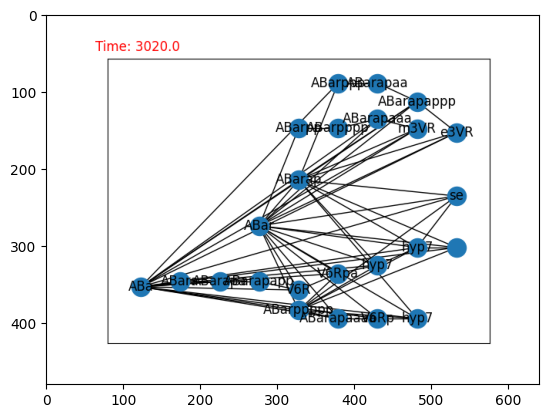

In [45]:
plt.imshow(images[-1])

In [46]:
Image.fromarray(images[1]).save("next_step.png")

In [47]:
imgs[0].save("array3.gif", save_all=True, append_images=imgs[1:], duration=1000, loop=0)

In [25]:
imgs[0].save("array2.gif", save_all=True, append_images=imgs[1:], duration=1000, loop=0)

In [ ]:
HTML(animation.to_html5_video())


In [ ]:
generated_network = GeneratedNetwork(graph)

In [ ]:
generated_network(torch.ones(2))[graph.output_nodes]

#### RL

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from typing import Any, Dict, Optional, Callable
import torch.distributions as td
import numpy as np
import gym

In [ ]:
# from ezrl.optimizer import RLOptimizer
# from ezrl.policy import GymPolicy
# from ezrl.algorithms.reinforce import ReinforceOptimizer

In [ ]:
from growing_nn.graph.directed_graph import DirectedGraph
from growing_nn.graph.graph_nca import GraphNCA
from growing_nn.graph.generated_network import GeneratedNetwork
from ezrl.optimizer import RLOptimizer
from ezrl.policy import GymPolicy
from ezrl.algorithms.reinforce import ReinforceOptimizer

In [ ]:
env = gym.make("LunarLander-v2")

In [ ]:
class LunarLanderNCAPolicy(GymPolicy):
    def __init__(self, nca, num_growth_steps: int = 3):
        super().__init__()
        self.input_dims = 8
        self.output_dims = 4
        self.num_growth_steps = num_growth_steps

        self.nca = nca

    def generate_network(self, num_steps):
        graph = self.nca.grow(self.nca.graph, num_steps)
        generated_network = graph.generate_network()
        return generated_network

    def forward(self, obs: Any, generated_network = None) -> Dict[str, Any]:
        if generated_network is not None:
            generated_network = self.generate_network(self.num_growth_steps)
        logits = generated_network.batch_forward(inputs=obs)
        dist = td.Categorical(logits=logits)
        action = dist.sample()
        return {"action":action, "dist":dist}

    def act(self, obs: Any, generated_network = None):
        out = self.forward(obs, generated_network)
        return out["action"].item(), out

In [ ]:
def reinforce_rollout(
    policy: GymPolicy, env_name: str = None, env=None, env_creation_fn=None
):
    if env_name is None and env is None:
        raise ValueError("env_name or env must be provided!")
    if env is None:
        if env_creation_fn is None:
            env_creation_fn = gym.make
        env = env_creation_fn(env_name)
    done = False
    observations, actions, rewards = (
        [],
        [],
        [],
    )
    observation = env.reset()
    with torch.no_grad():
        generated_network = policy.generate_network(policy.num_growth_steps)
        while not done:
            action, out = policy.act(
                torch.from_numpy(observation).unsqueeze(0).to(policy.device), generated_network
            )
            next_observation, reward, done, info = env.step(action)

            observations.append(observation)
            actions.append(action)
            rewards.append(reward)

            observation = next_observation

    return np.array(observations), np.array(actions), np.array(rewards)


In [ ]:
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime

def get_tensorboard_logger(experiment_name: str, base_log_path: str = "tensorboard_logs"):
    log_path = "{}/{}_{}".format(
            base_log_path, experiment_name, datetime.now()
        )
    train_writer = SummaryWriter(log_path, flush_secs=10)
    full_log_path = os.path.join(os.getcwd(), log_path)
    print(
        "Follow tensorboard logs with: tensorboard --logdir '{}'".format(
            full_log_path
        )
    )
    return train_writer

In [ ]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 24

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [ ]:
def make_inital_graph(num_inputs, num_outputs, device):
    x = torch.ones((num_inputs + num_outputs, NUM_CHANNELS), device=device)
    edge_dict = {}
    for i in range(num_inputs):
        edge_dict[i] = list(range(num_inputs, num_inputs+num_outputs))
    for i in range(num_inputs, num_inputs+num_outputs):
        edge_dict[i] = []
    return Graph(x, edge_dict, num_inputs, num_outputs)

In [ ]:
device = torch.device('cuda')

graph = make_inital_graph(8, 4, device)

In [ ]:
image = graph.plot()

In [ ]:
graph.nodes

In [ ]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)

In [ ]:
from tqdm import tqdm


policy = LunarLanderNCAPolicy(nca,num_growth_steps=16)
policy = policy.to(device)

In [ ]:
bar = tqdm(np.arange(50000))

writer = get_tensorboard_logger("ReinforceLunarLander")
optimizer = ReinforceOptimizer(policy, lr=0.001)

for i in bar:
    observations, actions, rewards = optimizer.rollout(reinforce_rollout, env_name = "LunarLander-v2")

    torch_observations = torch.from_numpy(observations).to(policy.device)
    torch_actions = torch.from_numpy(actions).float().to(policy.device)
    torch_rewards = torch.from_numpy(rewards).float().to(policy.device)


    optimizer.zero_grad()
    loss = optimizer.loss_fn(torch_observations, torch_actions, torch_rewards)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy.parameters(), 10.0)
    optimizer.step()

    # metrics

    grad_dict = {}
    for n, W in policy.named_parameters():
        if W.grad is not None:
            grad_dict["{}_grad".format(n)] = float(torch.sum(W.grad).item())

    loss = loss.item()
    sum_reward = np.sum(rewards)

    metrics_dict = {"loss":loss, "sum_reward":sum_reward, **grad_dict}

    for key in metrics_dict:
        writer.add_scalar(key, metrics_dict[key], i)


    bar.set_description("Loss: {}, Reward: {}".format(loss, sum_reward))